# Import necessary libs

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  

# Load the Dataset

In [2]:
from sklearn import datasets

wine = datasets.load_wine()

X = wine.data[:, :]
y = wine.target

# Split the Dataset
Split the dataset into 80% trainning and 20% test examples

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Pre-process the dataset
In order to have a normalized base

In [4]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

X_train = np.interp(X_train, (X_train.min(), X_train.max()), (0, 1))
X_test = np.interp(X_test, (X_test.min(), X_test.max()), (0, 1))

# Create the Classifier
And predict the class of test base

In [5]:
from mvpa2.suite import *
import matplotlib.pyplot as pl

som = SimpleSOMMapper((20, 30), 400, learning_rate=0.05)
som.train(X_train)

# Evaluate the results
Plot the confusion matrix and the classification report (precision, recall, f1-score and the support)

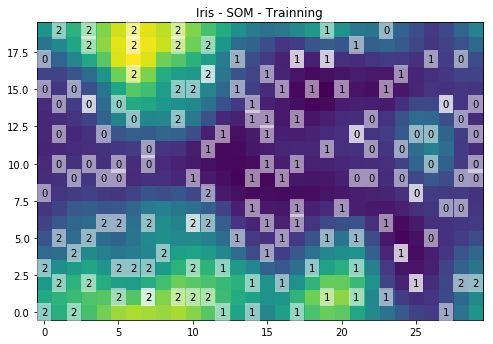

In [6]:
pl.figure(1, figsize=(8, 6))
pl.clf()

pl.title('Iris - SOM - Trainning')
pl.imshow(som.K[:,:,1], origin='lower')

mapped = som(X_train)

for i, m in enumerate(mapped):
    pl.text(m[1], m[0], y_train[i], ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))

pl.show()

[[11 12]
 [ 9 12]
 [ 4 27]
 [ 8 29]
 [ 3  7]
 [ 3  8]
 [ 1 24]
 [13 21]
 [ 4 13]
 [ 8 15]
 [ 8 23]
 [ 4 16]
 [ 8 16]
 [18 28]
 [14  2]
 [11 14]
 [12  4]
 [ 5  1]
 [10 12]
 [ 3 18]
 [13  0]
 [15 17]
 [ 9 14]
 [ 8 26]
 [ 7 22]
 [ 4  9]
 [ 4  9]
 [ 3 16]
 [ 4 27]
 [10 20]
 [ 2 23]
 [ 3 16]
 [16 23]
 [ 7 24]
 [ 4 15]
 [10 23]]


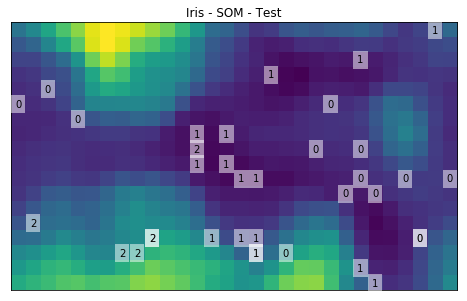

In [8]:
pl.figure(2, figsize=(8, 6))
pl.clf()

pl.imshow(som.K[:,:,1], origin='lower')

mapped = som(X_test)
pl.title('Iris - SOM - Test')
print mapped
# print mapped
x_min, x_max = mapped[:, 1].min() - .5, mapped[:, 1].max() + .5
y_min, y_max = mapped[:, 0].min() - .5, mapped[:, 0].max() + .5
pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)
pl.xticks(())
pl.yticks(())

for i, m in enumerate(mapped):
    pl.text(m[1], m[0], y_test[i], ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))


pl.show()

This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
              [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
              [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

